# Importacion de librerias a utilizar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

# Dataframes a utilizar

In [ ]:
Captaciones_por_localidad = pd.read_excel('/content/drive/MyDrive/DATAFRAMES/Captaciones por localidad.xlsx')
Cartera_de_créditos_por_localidad = pd.read_excel('/content/drive/MyDrive/DATAFRAMES/Cartera de créditos por localidad.xlsx')
Cartera_de_creditos_por_genero = pd.read_excel('/content/drive/MyDrive/DATAFRAMES/Cartera de créditos por por genero.xlsx')
Operaciones_de_Subagentes_bancarios = pd.read_excel('/content/drive/MyDrive/DATAFRAMES/Operaciones de Subagentes bancarios.xlsx')
Subagentes_por_localidad_y_actividad_económica = pd.read_excel('/content/drive/MyDrive/DATAFRAMES/Sucursales de Subagentes bancarios por localidad y actividad económica.xlsx')

# Análisis Exploratorio de datos (EDA)





In [ ]:
def human_format(num, pos):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '%.2f%s' % (num, ['', 'K', 'M', 'MM', 'B', 'BB'][magnitude])

formatter = FuncFormatter(human_format)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.yaxis.set_major_formatter(FuncFormatter(human_format))



## 1. Análisis de Captaciones por localidad



### Distribución de captaciones por región
Este gráfico mostrará la distribución de los balances de captaciones para cada región, permitiéndonos ver la mediana, los cuartiles y los valores atípicos

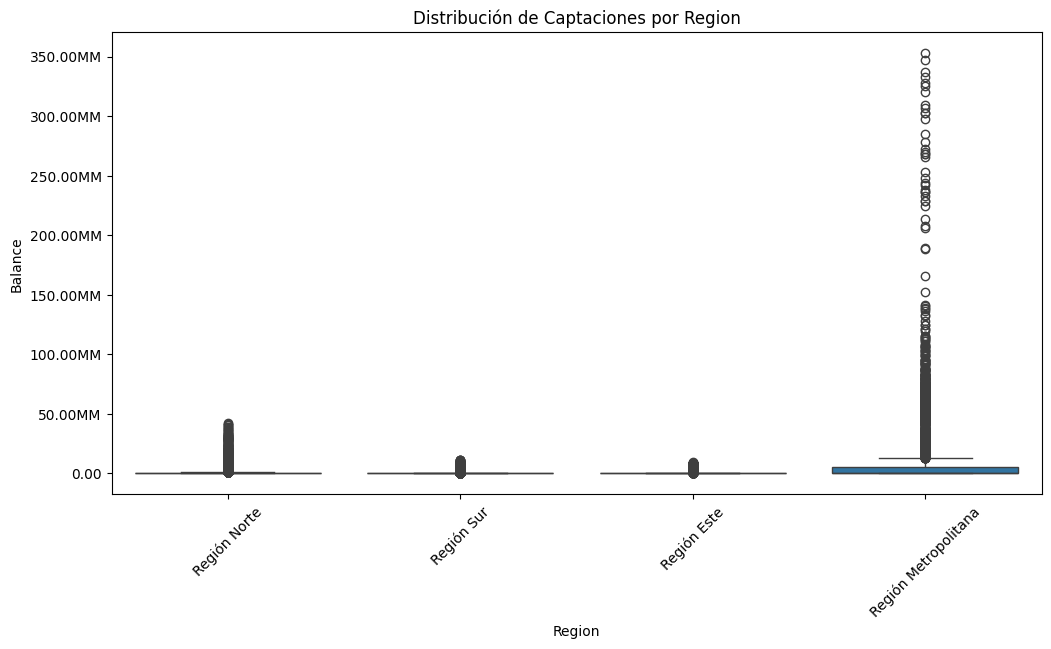

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
sns.boxplot(x='region', y='balance' ,data= Captaciones_por_localidad)
plt.title('Distribución de Captaciones por Region')
plt.xlabel('Region')
plt.ylabel('Balance')
plt.xticks(rotation=45)
plt.show()

### Evolución temporal de las captaciones totales
Este gráfico mostrará cómo han evolucionado las captaciones totales a lo largo del tiempo.

Text(0, 0.5, 'Balance')

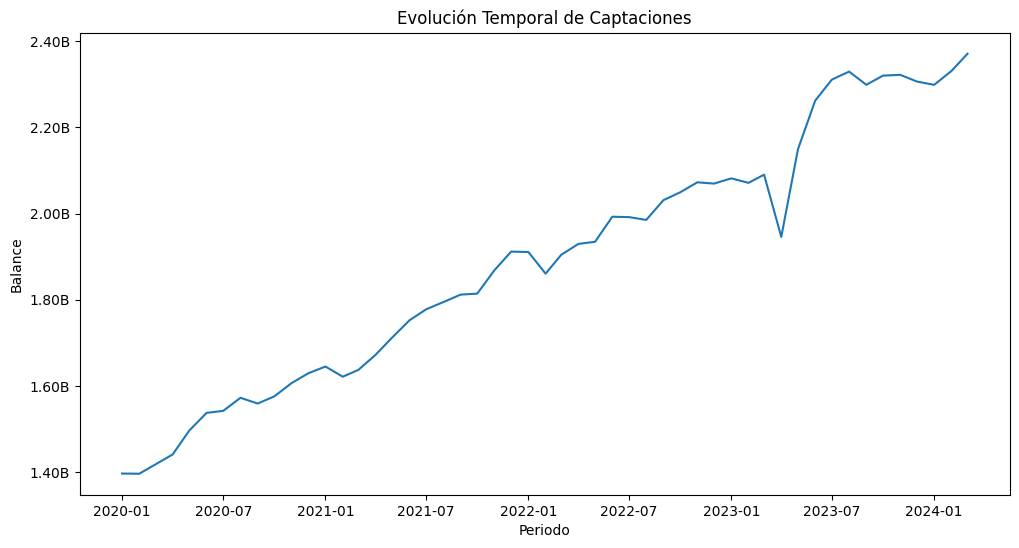

In [ ]:
Captaciones_por_localidad['periodo'] = pd.to_datetime(Captaciones_por_localidad['periodo'])
captaciones_mensuales = Captaciones_por_localidad.groupby('periodo')['balance'].sum().reset_index()
fig, ax = plt.subplots(figsize=(12, 6))
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
sns.lineplot(x='periodo', y='balance', data=captaciones_mensuales)
plt.title('Evolución Temporal de Captaciones')
plt.xlabel('Periodo')
plt.ylabel('Balance')

### Top 10 provincias por captaciones:
Este gráfico mostrará las 10 provincias con mayores captaciones totales.

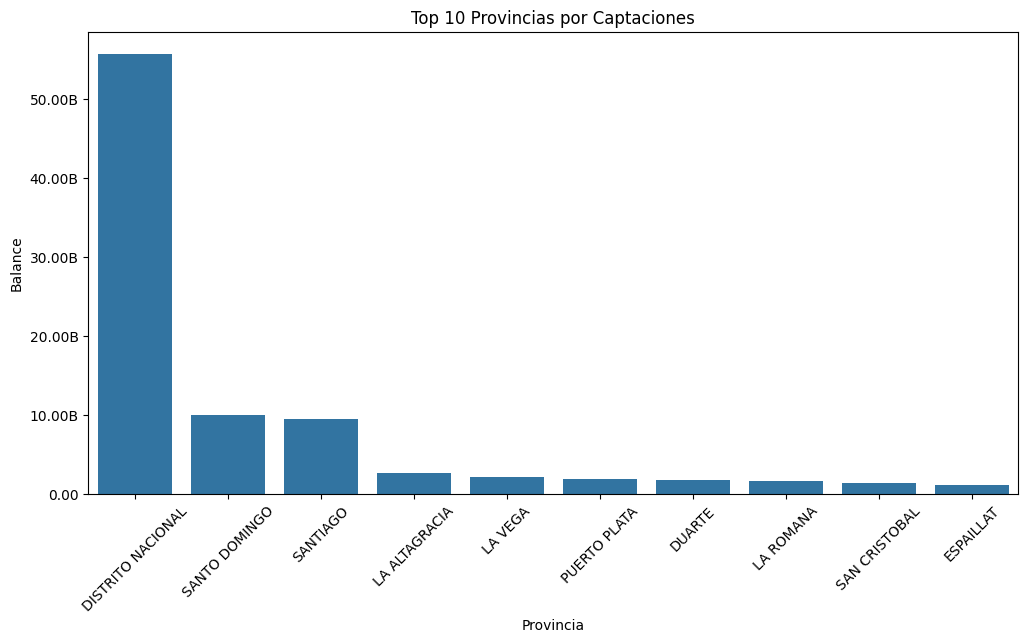

In [ ]:
top_10_provincias = Captaciones_por_localidad.groupby('provincia')['balance'].sum().nlargest(10).reset_index()
fig, ax = plt.subplots(figsize=(12, 6))
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
sns.barplot(x='provincia', y='balance', data=top_10_provincias)
plt.title('Top 10 Provincias por Captaciones')
plt.xlabel('Provincia')
plt.ylabel('Balance')
plt.xticks(rotation=45)
plt.show()

## 2. Análisis de cartera de la deuda por tipo de cartera

### Distribucion de la deuda por tipo de cartera

Este gráfico mostrará la distribución de la deuda para cada tipo de cartera, permitiéndonos comparar los diferentes tipos de créditos.

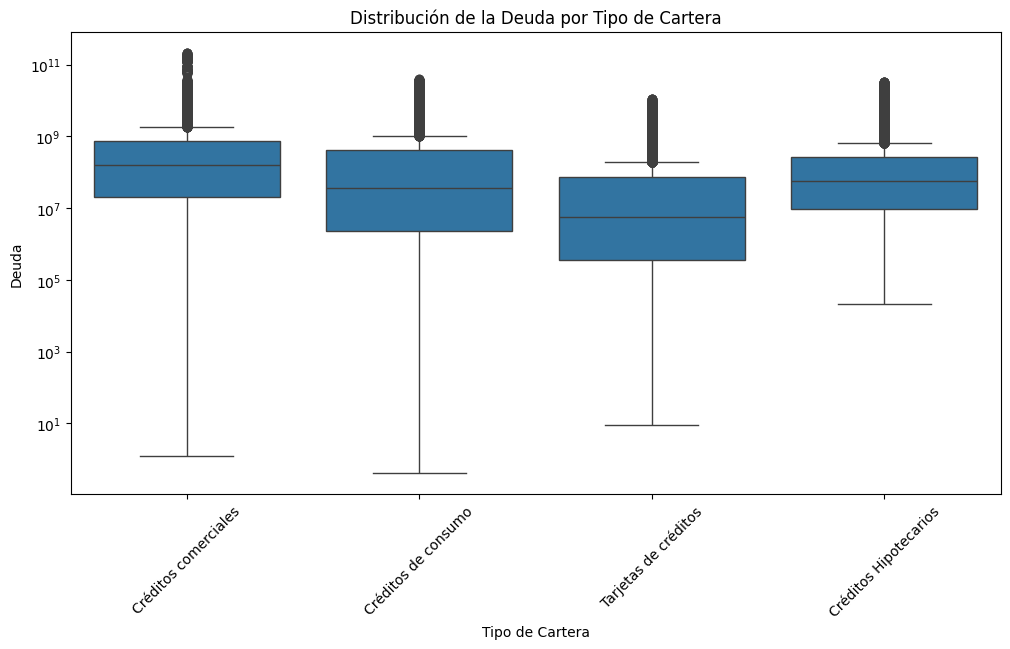

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
sns.boxplot(x='tipoCartera', y='deuda', data=Cartera_de_créditos_por_localidad)
plt.title('Distribución de la Deuda por Tipo de Cartera')
plt.xlabel('Tipo de Cartera')
plt.ylabel('Deuda')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()

### Evolución temporal de la cantidad de créditos
Este gráfico mostrará cómo ha evolucionado la cantidad total de créditos a lo largo del tiempo.

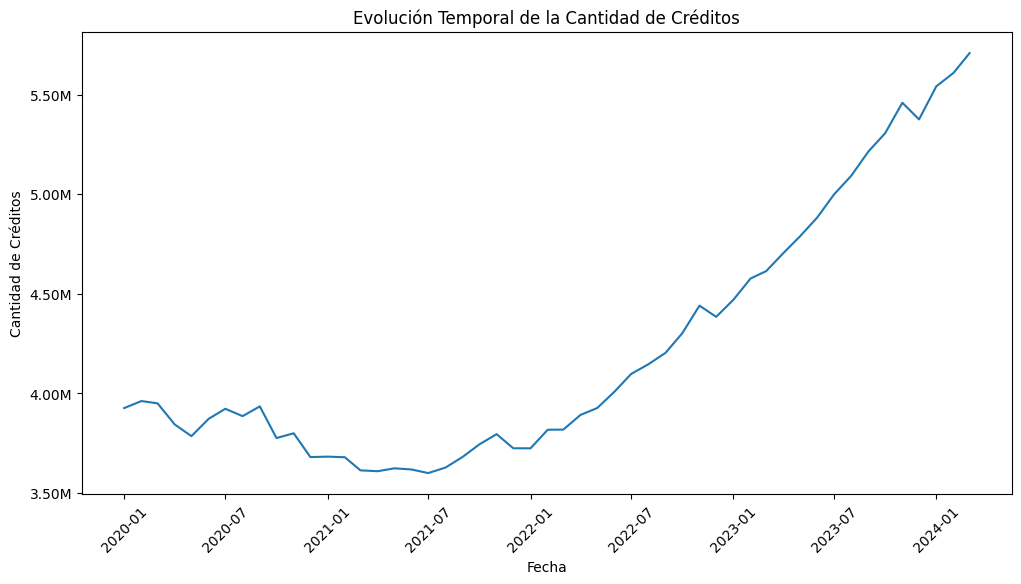

In [ ]:
Cartera_de_créditos_por_localidad['periodo'] = pd.to_datetime(Cartera_de_créditos_por_localidad['periodo'])
creditos_mensuales = Cartera_de_créditos_por_localidad.groupby('periodo')['cantidadCredito'].sum().reset_index()
fig, ax = plt.subplots(figsize=(12, 6))
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
plt.plot(creditos_mensuales['periodo'], creditos_mensuales['cantidadCredito'])
plt.title('Evolución Temporal de la Cantidad de Créditos')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Créditos')
plt.xticks(rotation=45)
plt.show()


### Top 10 provincias por deuda total
Este gráfico mostrará las 10 provincias con mayor deuda total.

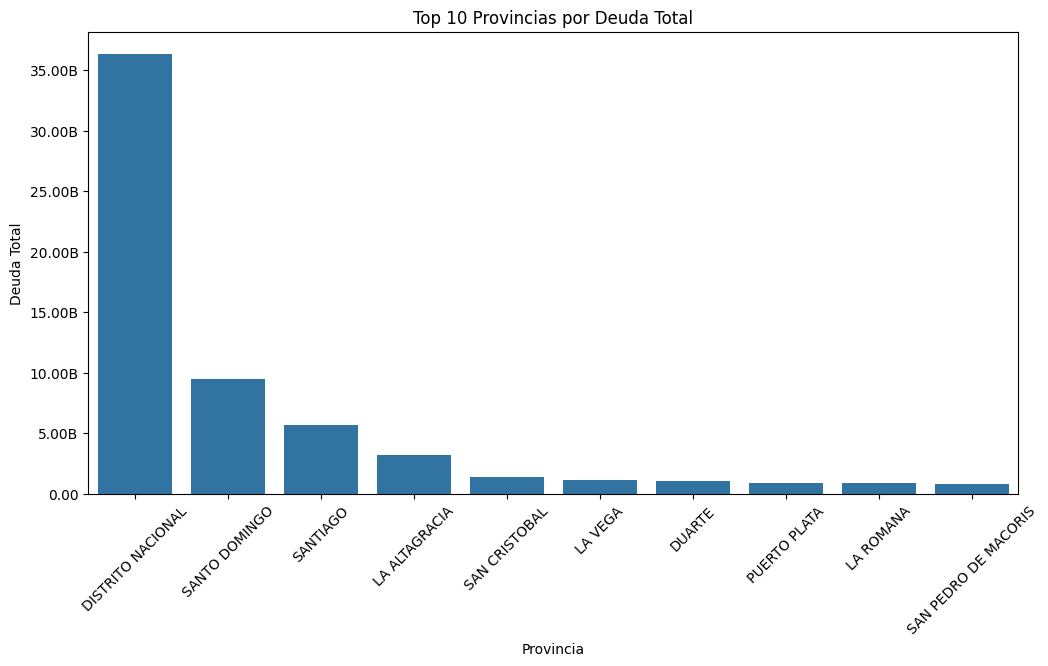

In [ ]:
top_10_provincias_deuda = Cartera_de_créditos_por_localidad.groupby('provincia')['deuda'].sum().nlargest(10).reset_index()
fig, ax = plt.subplots(figsize=(12, 6))
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
sns.barplot(x='provincia', y='deuda', data=top_10_provincias_deuda)
plt.title('Top 10 Provincias por Deuda Total')
plt.xlabel('Provincia')
plt.ylabel('Deuda Total')
plt.xticks(rotation=45)
plt.show()

## 3. Cartera de créditos por genero

### Comparación de la cantidad de créditos por género
Este gráfico mostrará la comparación de la cantidad de créditos entre géneros.



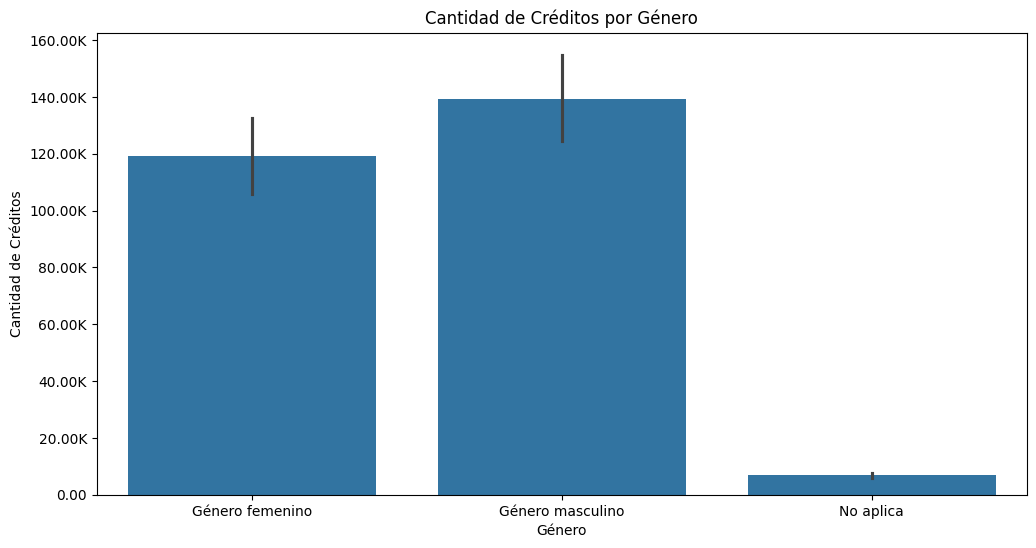

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='genero' ,y = 'cantidadCredito', data=Cartera_de_creditos_por_genero)
plt.title('Cantidad de Créditos por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Créditos')
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
plt.show()

### Evolución temporal de la deuda por género
Este gráfico mostrará cómo ha evolucionado la deuda para cada género a lo largo del tiempo.

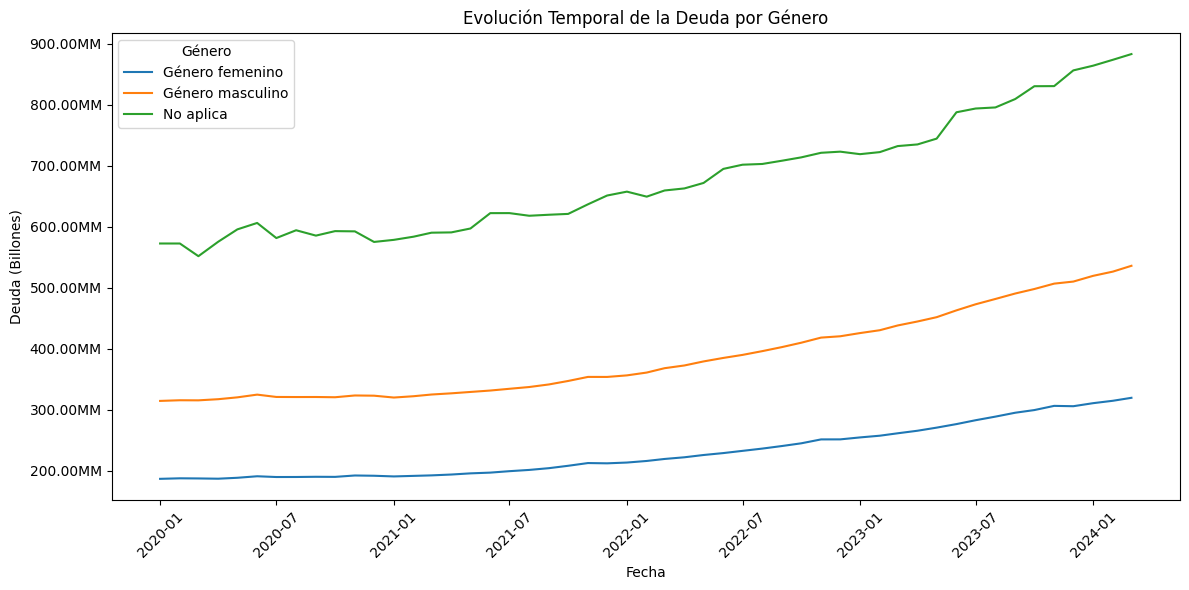

In [ ]:
Cartera_de_creditos_por_genero['periodo'] = pd.to_datetime(Cartera_de_creditos_por_genero['periodo'])
deuda_por_genero = Cartera_de_creditos_por_genero.groupby(['periodo', 'genero'])['deuda'].sum().unstack()

fig, ax = plt.subplots(figsize=(12, 6))

for genero in deuda_por_genero.columns:
    ax.plot(deuda_por_genero.index, deuda_por_genero[genero], label=genero)


ax.yaxis.set_major_formatter(FuncFormatter(human_format))

plt.title('Evolución Temporal de la Deuda por Género')
plt.xlabel('Fecha')
plt.ylabel('Deuda (Billones)')
plt.xticks(rotation=45)
plt.legend(title='Género')


plt.tight_layout()
plt.show()

### Comparación de tasas promedio ponderadas por género
Este gráfico mostrará la distribución de las tasas por deuda ponderadas para cada género

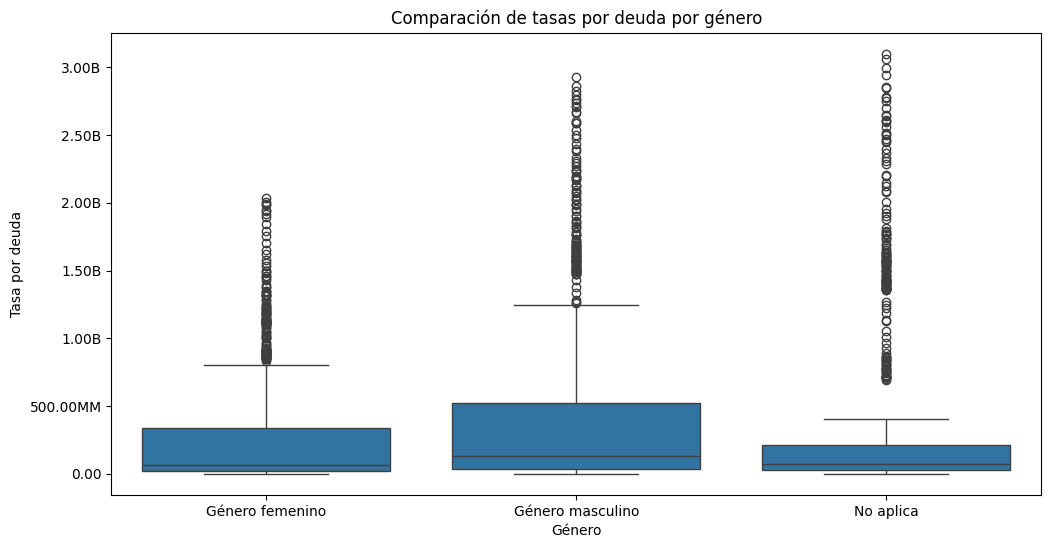

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
sns.boxplot(x='genero', y='tasaPorDeuda', data=Cartera_de_creditos_por_genero)
plt.title('Comparación de tasas por deuda por género')
plt.xlabel('Género')
plt.ylabel('Tasa por deuda')
plt.show()

## 4. Analisis de operaciones de Subagentes **Bancarios**

### Top 10 actividades económicas por cantidad de transacciones
Este gráfico mostrará las 10 actividades económicas con mayor cantidad de transacciones.



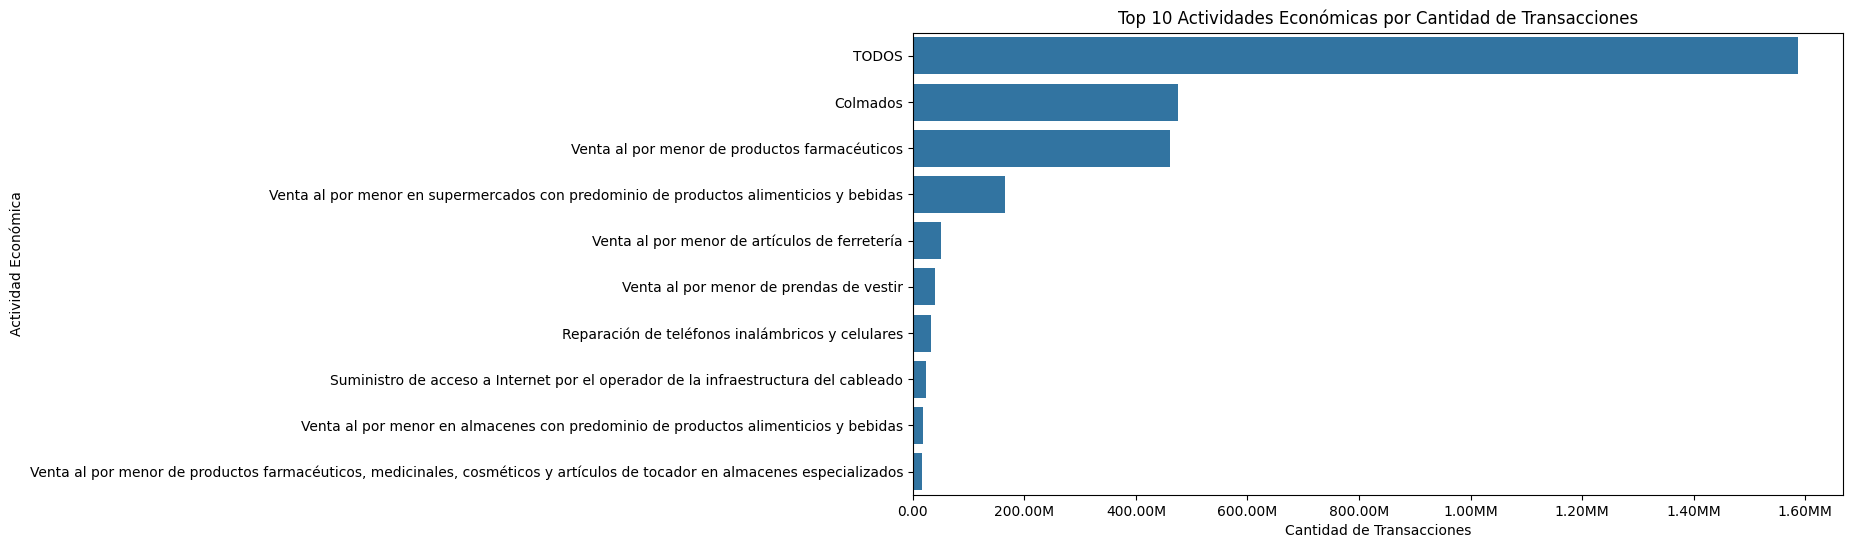

In [ ]:
top_10_actividades = Operaciones_de_Subagentes_bancarios.groupby('actividadEconomica')['cantidadTransacciones'].sum().nlargest(10).reset_index()
fig, ax = plt.subplots(figsize=(12, 6))
ax.xaxis.set_major_formatter(FuncFormatter(human_format))
sns.barplot(x='cantidadTransacciones', y='actividadEconomica', data=top_10_actividades)
plt.title('Top 10 Actividades Económicas por Cantidad de Transacciones')
plt.xlabel('Cantidad de Transacciones')
plt.ylabel('Actividad Económica')
plt.show()

### Evolución temporal del valor transado
Este gráfico mostrará cómo ha evolucionado el valor total transado a lo largo del tiempo.



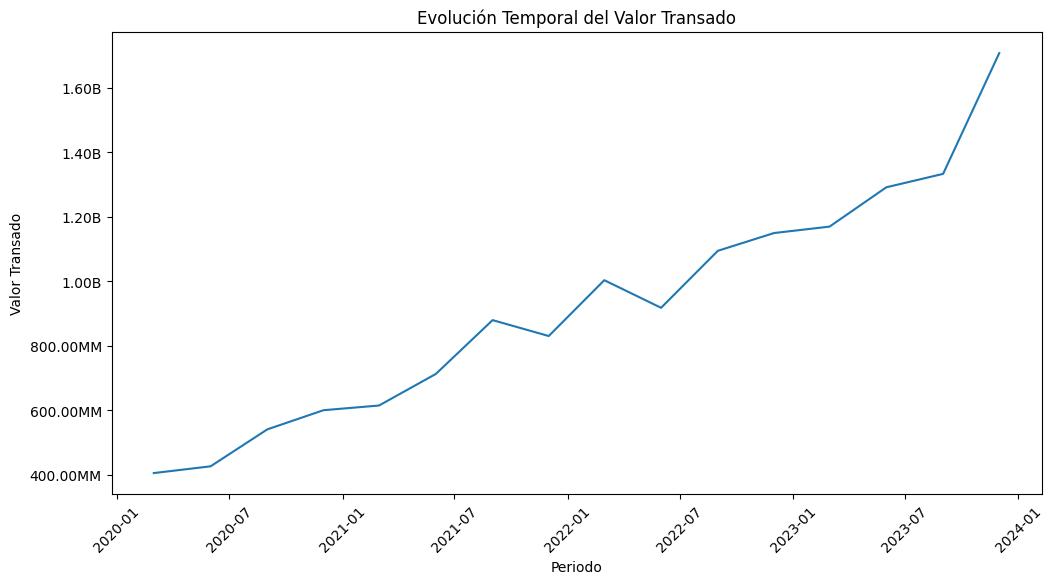

In [ ]:
Operaciones_de_Subagentes_bancarios['periodo'] = pd.to_datetime(Operaciones_de_Subagentes_bancarios['periodo'])
valor_transado_mensual = Operaciones_de_Subagentes_bancarios.groupby('periodo')['valorTransado'].sum().reset_index()
fig, ax = plt.subplots(figsize=(12, 6))
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
sns.lineplot(x='periodo', y='valorTransado', data=valor_transado_mensual)
plt.title('Evolución Temporal del Valor Transado')
plt.xlabel('Periodo')
plt.ylabel('Valor Transado')
plt.xticks(rotation=45)
plt.show()

### Distribución de tipos de transacciones por región
Este gráfico mostrará la distribución de los diferentes tipos de transacciones para cada región

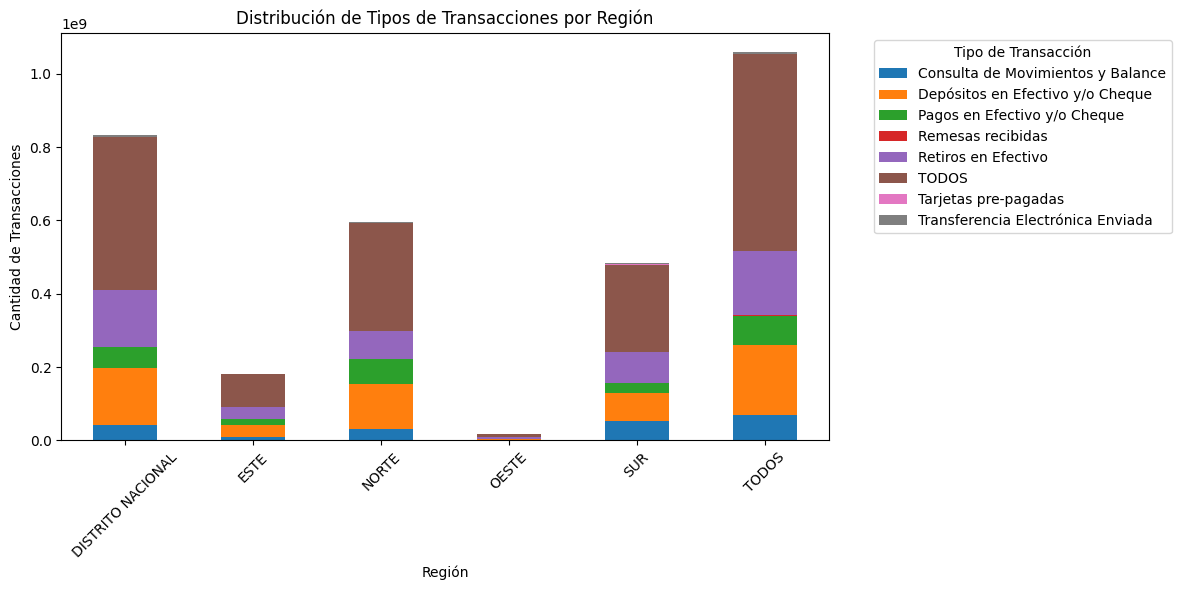

In [ ]:
transacciones_por_region = Operaciones_de_Subagentes_bancarios.groupby(['region', 'tipoTransaccion'])['cantidadTransacciones'].sum().unstack()

fig, ax = plt.subplots(figsize=(12, 6))
transacciones_por_region.plot(kind='bar', stacked=True, ax=ax)
plt.title('Distribución de Tipos de Transacciones por Región')
plt.xlabel('Región')
plt.ylabel('Cantidad de Transacciones')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Transacción', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 5. Analisis por localidad y actividad económica

### Top 10 actividades económicas por cantidad de sucursales
Este gráfico mostrará las 10 actividades económicas con mayor cantidad de sucursales de subagentes bancarios.

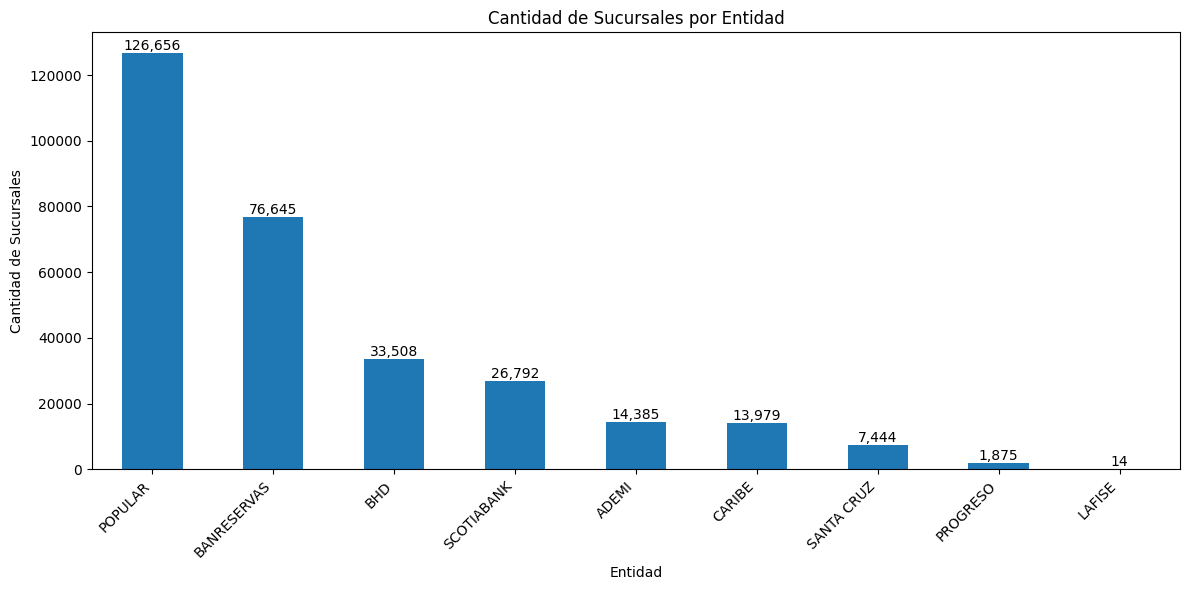

In [ ]:

sucursales_por_tipo = Subagentes_por_localidad_y_actividad_económica.groupby('entidad')['cantidadSucursales'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
sucursales_por_tipo.plot(kind='bar', ax=ax)

plt.title('Cantidad de Sucursales por Entidad')
plt.xlabel('Entidad')
plt.ylabel('Cantidad de Sucursales')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(sucursales_por_tipo):
    ax.text(i, v, f'{v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Evolución temporal de la cantidad total de sucursales
Este gráfico mostrará cómo ha evolucionado la cantidad total de sucursales de subagentes bancarios a lo largo del tiempo.

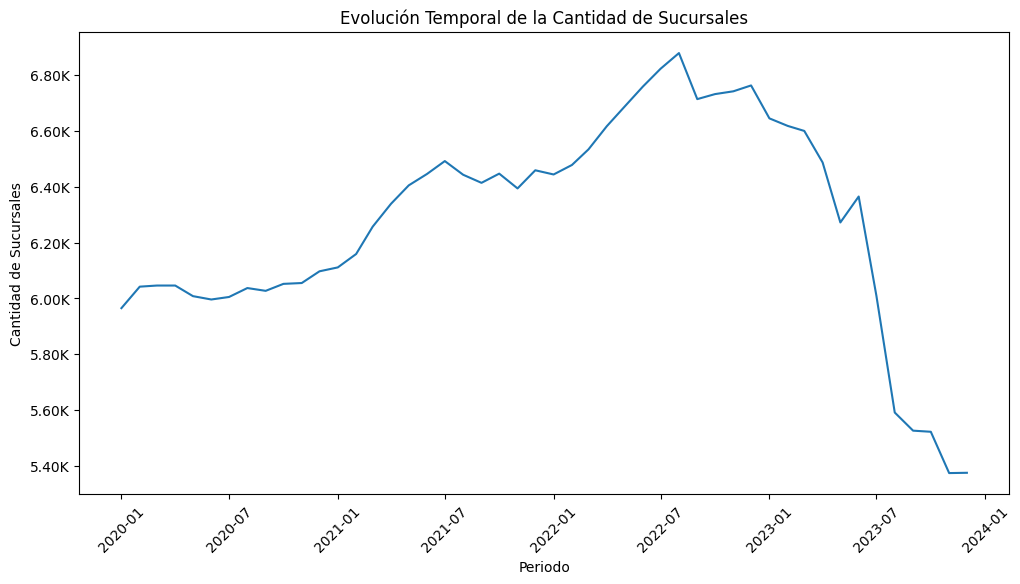

In [ ]:
Subagentes_por_localidad_y_actividad_económica['periodo'] = pd.to_datetime(Subagentes_por_localidad_y_actividad_económica['periodo'])
sucursales_mensuales = Subagentes_por_localidad_y_actividad_económica.groupby('periodo')['cantidadSucursales'].sum().reset_index()
fig , ax = plt.subplots(figsize=(12, 6))
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
sns.lineplot(x='periodo', y='cantidadSucursales', data=sucursales_mensuales)
plt.title('Evolución Temporal de la Cantidad de Sucursales')
plt.xlabel('Periodo')
plt.ylabel('Cantidad de Sucursales')
plt.xticks(rotation=45)
plt.show()